In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import norm, t
import statsmodels.api as sm



Exercise 6

In [30]:
data = pd.read_csv('data/carmileage.csv')
data.head()

,MAKEMODEL,VOL,HP,MPG,SP,WT
0,GM/GeoMetroXF1,89,49,65.4,96,17.5
1,GM/GeoMetro,92,55,56.0,97,20.0
2,GM/GeoMetroLSI,92,55,55.9,97,20.0
3,SuzukiSwift,92,70,49.0,105,20.0
4,DaihatsuCharade,92,53,46.5,96,20.0


In [31]:
data.describe()

,VOL,HP,MPG,SP,WT
count,82.000000,82.000000,82.000000,82.000000,82.000000
mean,98.804878,117.134146,33.781707,112.414634,30.914634
std,22.166285,56.840857,10.004605,14.037825,8.141422
min,50.000000,49.000000,13.200000,90.000000,17.500000
25%,89.500000,84.000000,27.775000,105.000000,25.000000
50%,101.000000,99.000000,32.450000,109.000000,30.000000
75%,113.000000,140.000000,39.300000,114.750000,35.000000
max,160.000000,322.000000,65.400000,165.000000,55.000000


In [32]:
def linear_regression(X, Y):
  n = len(X)
  if isinstance(X, pd.Series):
    column_names = [X.name]
  elif isinstance(X, pd.DataFrame):
    column_names = X.columns.tolist()

  column_names.append('const')
  print(column_names)
  X = np.column_stack((X, np.ones(n)))
  beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
  epsilon = Y - X.dot(beta)
  residuals = epsilon.T.dot(epsilon)
  n, p = X.shape
  residuals_var = np.sum(residuals)/(n - p)
  cov_matrix = residuals_var * np.linalg.inv(X.T.dot(X))
  se_beta = np.sqrt(np.diag(cov_matrix))
  z = norm.ppf(0.975)
  #ci_95 = [(beta[0] - z * se_beta[0], beta[0] + z * se_beta[0]), (beta[1] - z * se_beta[1], beta[1] + z * se_beta[1])]
  T = beta/se_beta
  p_values = 2 * (1 - t.cdf(np.abs(T), X.shape[0] - 1))
  print(se_beta)
  print(beta)
  return pd.DataFrame({
        'coef': beta,
        'std err': se_beta,

        'T test': T,
        'P value': p_values
        }, index=column_names)

X = data['HP']
Y = data['MPG']

results = linear_regression(X, Y)
results

['HP', 'const']
[0.01206873 1.56948675]
[-0.13902326 50.06607807]


,coef,std err,T test,P value
HP,-0.139023,0.012069,-11.519295,0.0
const,50.066078,1.569487,31.899650,0.0


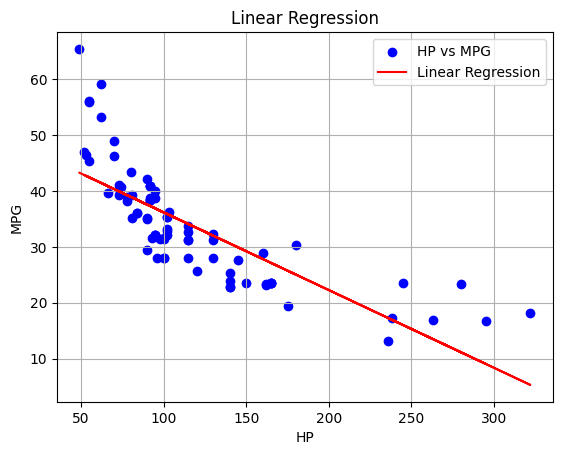

In [33]:
beta = results['coef']
plt.scatter(X, Y, color='blue', label='HP vs MPG')
plt.plot(X, beta[1] + beta[0]*X, color='red', label='Linear Regression')
plt.xlabel('HP')
plt.ylabel('MPG')
plt.title('Linear Regression')
plt.legend()

plt.grid(True)
plt.show()

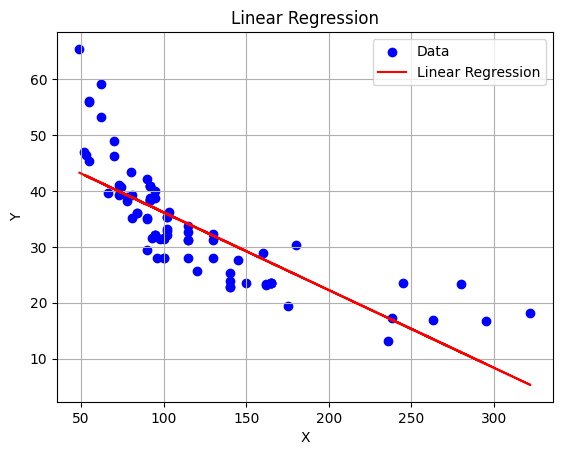

In [34]:
model = LinearRegression()
X = np.array(X).reshape(-1, 1)
model.fit(X, Y)

plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()

plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     132.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.15e-18
Time:                        21:10:37   Log-Likelihood:                -264.61
No. Observations:                  82   AIC:                             533.2
Df Residuals:                      80   BIC:                             538.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0661      1.569     31.900      0.0

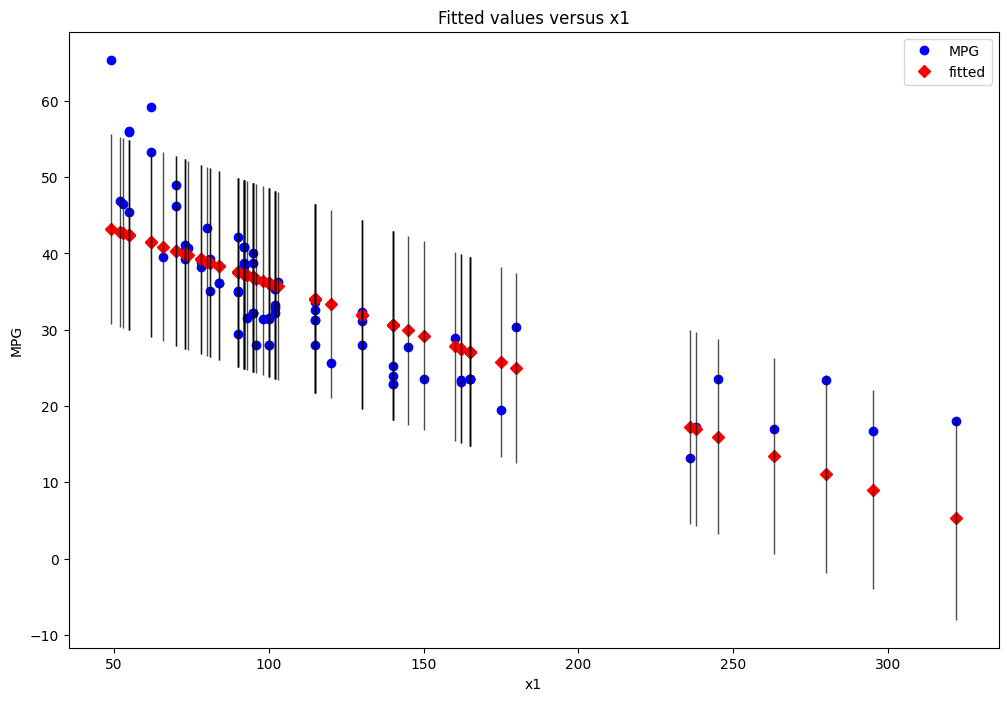

In [35]:
results = sm.OLS(Y, sm.add_constant(X)).fit()
print(results.summary())
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(results, 1, ax=ax)
plt.show()

['HP', 'const']
[0.00030854 0.04012379]
[-0.0045889  4.0132294]


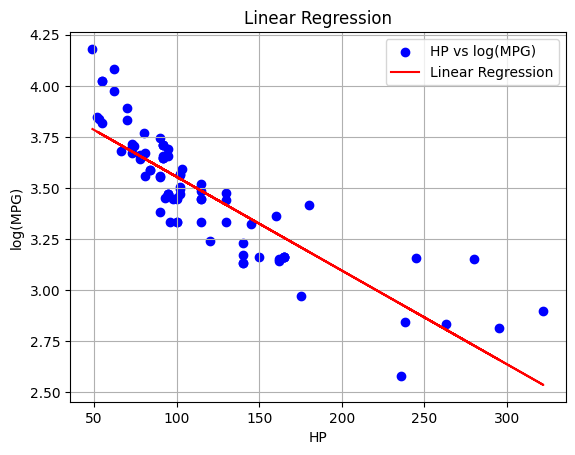

,coef,std err,T test,P value
HP,-0.004589,0.000309,-14.873129,0.0
const,4.013229,0.040124,100.021194,0.0


In [36]:
X = data['HP']
Y = np.log(data['MPG'])

results = linear_regression(X, Y)
beta = results['coef']
plt.scatter(X, Y, color='blue', label='HP vs log(MPG)')
plt.plot(X, beta[1] + beta[0]*X, color='red', label='Linear Regression')
plt.xlabel('HP')
plt.ylabel('log(MPG)')
plt.title('Linear Regression')
plt.legend()

plt.grid(True)
plt.show()
results

Exercise 7

In [37]:
data


,MAKEMODEL,VOL,HP,MPG,SP,WT
0,GM/GeoMetroXF1,89,49,65.4,96,17.5
1,GM/GeoMetro,92,55,56.0,97,20.0
2,GM/GeoMetroLSI,92,55,55.9,97,20.0
3,SuzukiSwift,92,70,49.0,105,20.0
4,DaihatsuCharade,92,53,46.5,96,20.0
...,...,...,...,...,...,...
77,Mercedes500SL,50,322,18.1,165,45.0
78,Mercedes560SEL,115,238,17.2,140,45.0
79,JaguarXJSConvert,50,263,17.0,147,45.0
80,BMW750IL,119,295,16.7,157,45.0


In [38]:
features = ['VOL', 'HP', 'SP', 'WT']

X = data[features]
Y = data['MPG']

In [39]:
results = linear_regression(X, Y)

results


['VOL', 'HP', 'SP', 'WT', 'const']
[2.28252696e-02 8.14123596e-02 2.44773491e-01 2.13363025e-01
 2.35316133e+01]
[-1.56450113e-02  3.92212315e-01 -1.29481848e+00 -1.85980373e+00
  1.92437753e+02]


,coef,std err,T test,P value
VOL,-0.015645,0.022825,-0.685425,4.950327e-01
HP,0.392212,0.081412,4.817602,6.671547e-06
SP,-1.294818,0.244773,-5.289864,1.019119e-06
WT,-1.859804,0.213363,-8.716617,2.888800e-13
const,192.437753,23.531613,8.177839,3.351097e-12


In [40]:
results = sm.OLS(Y, sm.add_constant(X)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     132.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           9.98e-34
Time:                        21:10:38   Log-Likelihood:                -220.00
No. Observations:                  82   AIC:                             450.0
Df Residuals:                      77   BIC:                             462.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        192.4378     23.532      8.178      0.0

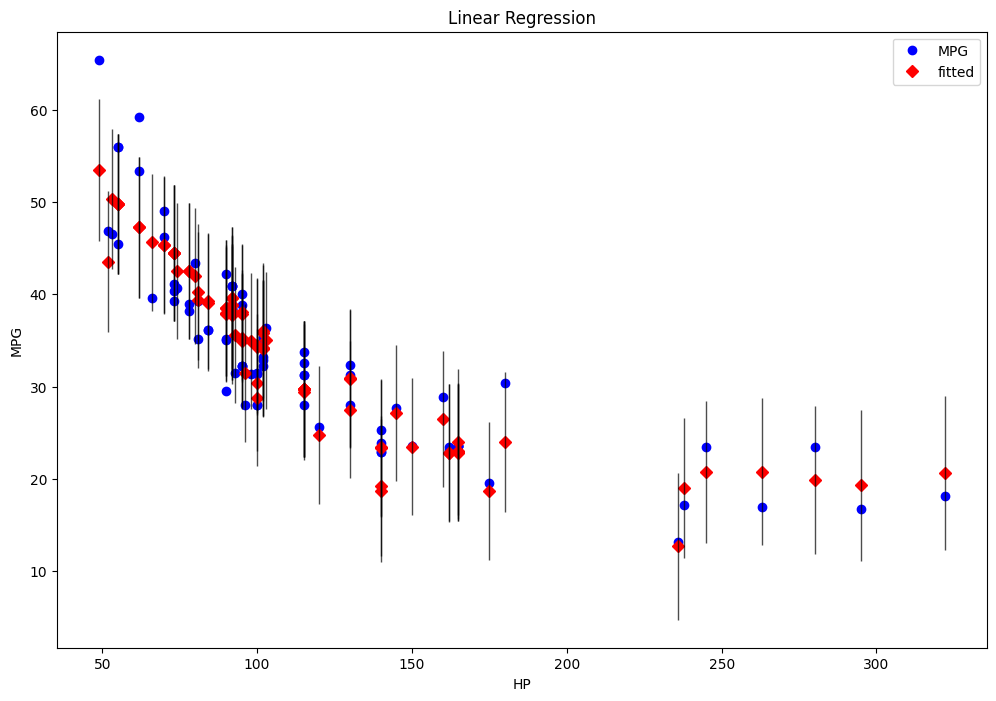

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(results, 2, ax=ax)
ax.set_ylabel("MPG")
ax.set_xlabel("HP")
ax.set_title("Linear Regression")
plt.show()

In [42]:
def residuals_variance(X, Y):
  n = len(X)
  X = np.column_stack((X, np.ones(n)))
  beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
  epsilon = Y - X.dot(beta)
  residuals = epsilon.T.dot(epsilon)
  n, p = X.shape
  residuals_var = np.sum(residuals)/(n - p)
  return residuals_var

In [43]:
def mallow_cp(X, Y, S, sigma_2):
  if len(S) > 0:
    X = np.column_stack((X[list(S)], np.ones(len(X))))
  else:
    X = np.expand_dims(np.ones(len(X)), 1)

  beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
  Y_pred = X.dot(beta)
  error = Y_pred - Y
  training_error = error.T.dot(error)
  return training_error + 2 * (len(S) + 1) * sigma_2


In [44]:
full_model_res_variance = residuals_variance(X, Y)

def score_mallow_cp(S):
    return mallow_cp(X, Y, S, full_model_res_variance)

In [45]:
from itertools import chain, combinations

def powerset(lst):
    return list(chain.from_iterable(combinations(lst, r) for r in range(len(lst)+1)))

results = [(S, score_mallow_cp(S)) for S in powerset(features)]

results = pd.DataFrame(results, columns = ['S', 'score'])
results

,S,score
0,(),8134.147794
1,"(VOL,)",7059.223052
2,"(HP,)",3102.805578
3,"(SP,)",4318.234609
4,"(WT,)",1519.372094
5,"(VOL, HP)",2354.823180
6,"(VOL, SP)",3056.598857
7,"(VOL, WT)",1542.174631
8,"(HP, SP)",2436.578842
9,"(HP, WT)",1510.677511


Best model with (HP, SP, WT) feature selection.

In [46]:
import  random

def forward_stepwise(features):
  current_subset = []
  current_score = score_mallow_cp(current_subset)
  random.shuffle(features)
  for f in features:
    if f not in current_subset:
      current_subset = current_subset + [f]
      if current_score < score_mallow_cp(current_subset):
        return (current_subset[:-1], current_score)
      current_score = score_mallow_cp(current_subset)
  return(current_subset, current_score)


current_subset, current_score = forward_stepwise(features)

pd.DataFrame([[tuple(current_subset), current_score]], columns=['S', 'score'])

,S,score
0,"(HP, SP, VOL, WT)",1160.807643


In [47]:
def backward_stepwise(features):
  current_subset = features
  print(current_subset)
  current_score = score_mallow_cp(current_subset)
  random.shuffle(features)
  for f in features:
    print(f)
    if f in current_subset:
      candidate_subset = [a for a in current_subset if a != f]
      candidate_score = score_mallow_cp(candidate_subset)

      if candidate_score > score_mallow_cp(current_subset):
        return (current_subset, current_score)
      current_subset = candidate_subset
      current_score = candidate_score
  return(current_subset, current_score)


current_subset, current_score = backward_stepwise(features)

pd.DataFrame([[tuple(current_subset), current_score]], columns=['S', 'score'])

['HP', 'SP', 'VOL', 'WT']
SP


,S,score
0,"(SP, VOL, HP, WT)",1160.807643


Zheng-Loh model selection


In [48]:
#fit the complete model
features = ['VOL', 'HP', 'SP', 'WT']
X = data[features]
Y = data['MPG']
results = linear_regression(X, Y)

results

['VOL', 'HP', 'SP', 'WT', 'const']
[2.28252696e-02 8.14123596e-02 2.44773491e-01 2.13363025e-01
 2.35316133e+01]
[-1.56450113e-02  3.92212315e-01 -1.29481848e+00 -1.85980373e+00
  1.92437753e+02]


,coef,std err,T test,P value
VOL,-0.015645,0.022825,-0.685425,4.950327e-01
HP,0.392212,0.081412,4.817602,6.671547e-06
SP,-1.294818,0.244773,-5.289864,1.019119e-06
WT,-1.859804,0.213363,-8.716617,2.888800e-13
const,192.437753,23.531613,8.177839,3.351097e-12


In [49]:
features = ['VOL', 'HP', 'SP', 'WT']
X = data[features]
Y = data['MPG']

In [50]:
results['W'] = results['coef']/results['std err']
W = results['W'].abs().sort_values( ascending=False)
W.index

Index(['WT', 'const', 'SP', 'HP', 'VOL'], dtype='object')

In [51]:
def zheng_loh_model_selection(X, Y):
    n, p = X.shape
    #1
    X = sm.add_constant(X)
    full_model = sm.OLS(Y, X).fit()
    rss = full_model.ssr
    sigma_squared = rss / (n - p - 1)
    #2
    Ws = np.abs(full_model.params / full_model.bse)

    sorted_indices = Ws.sort_values( ascending=False)

    #3
    min_rss = np.inf
    min_rss_idx = None
    for j in range(p):
        subset_index = sorted_indices.index[j]

        subset_model = sm.OLS(Y, X[subset_index]).fit()
        subset_rss = subset_model.ssr
        modified_rss = subset_rss + (j+1) * sigma_squared * np.log(n)

        if modified_rss < min_rss:
            min_rss = modified_rss
            min_rss_idx = j

    #4
    selected_indices = sorted_indices.index[:j+1]

    final_model = sm.OLS(Y, X[selected_indices]).fit()

    return final_model, selected_indices


features = ['VOL', 'HP', 'SP', 'WT']
X = data[features]
Y = data['MPG']
final_model, selected_indices = zheng_loh_model_selection(X, Y)


print("Final Model Summary:")
print(final_model.summary())
print("\nSelected Indices:", selected_indices)


Final Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     177.9
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           8.66e-35
Time:                        21:10:39   Log-Likelihood:                -220.25
No. Observations:                  82   AIC:                             448.5
Df Residuals:                      78   BIC:                             458.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
WT            -1.9221      0.19

In [56]:
def bic(X, Y, S):
  if len(S) > 0:
    X = np.column_stack((X[list(S)], np.ones(len(X))))
  else:
    X = np.expand_dims(np.ones(len(X)), 1)
  n, p = X.shape
  beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
  Y_pred = X.dot(beta)
  error = Y_pred - Y
  training_error = error.T.dot(error)
  sigma_squared = training_error / (n - p)
  ll = - n * np.log(np.sqrt(sigma_squared)) - (1 / (2 * sigma_squared)) * training_error
  return ll - (len(S) / 2) * np.log(n)

def score_bic(S):
  return bic(X, Y, S)


In [57]:
def mallow_cp(X, Y, S, sigma_2):
  if len(S) > 0:
    X = np.column_stack((X[list(S)], np.ones(len(X))))
  else:
    X = np.expand_dims(np.ones(len(X)), 1)

  beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
  Y_pred = X.dot(beta)
  error = Y_pred - Y
  training_error = error.T.dot(error)
  return training_error + 2 * (len(S) + 1) * sigma_2

full_model_res_variance = residuals_variance(X, Y)

def score_mallow_cp(S):
    return mallow_cp(X, Y, S, full_model_res_variance)

In [58]:
from itertools import chain, combinations

def powerset(lst):
    return list(chain.from_iterable(combinations(lst, r) for r in range(len(lst)+1)))

results = [(S, score_mallow_cp(S), score_bic(S)) for S in powerset(features)]

results = pd.DataFrame(results, columns = ['S', 'MCP_score', 'BIC_score'])
results

,S,MCP_score,BIC_score
0,(),8134.147794,-229.349734
1,"(VOL,)",7059.223052,-225.574815
2,"(HP,)",3102.805578,-191.471445
3,"(SP,)",4318.234609,-205.225057
4,"(WT,)",1519.372094,-161.442321
5,"(VOL, HP)",2354.823180,-181.674315
6,"(VOL, SP)",3056.598857,-192.698591
7,"(VOL, WT)",1542.174631,-163.552679
8,"(HP, SP)",2436.578842,-183.122003
9,"(HP, WT)",1510.677511,-162.659800
